In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import sys
from functools import reduce
import seaborn

In [2]:
pwd

'C:\\Users\\cmatt\\Dropbox\\Craig\\Bio722\\MG_AS_out\\json_outs'

In [3]:
#path = "/Users/craigmatthews/Dropbox/Craig/Bio722/MG_AS_out/json_outs/" #macdirectory path
path = "C:/Users/cmatt/Dropbox/Craig/Bio722/MG_AS_out/json_outs/" #PC
os.chdir(path)
#path = sys.argv[1] #mac path
toload = []
for filename in os.listdir(path):
    if filename.endswith('_long.tsv'):
        toload.append(filename)


toload

['ERR315859_bgc_long.tsv',
 'ERR594308_bgc_long.tsv',
 'ERR594312_bgc_long.tsv',
 'ERR599168_bgc_long.tsv',
 'SRR3719657_bgc_long.tsv',
 'SRR3727512_bgc_long.tsv',
 'SRR3943823_bgc_long.tsv',
 'SRR3952299_bgc_long.tsv',
 'SRR3979410_bgc_long.tsv',
 'SRR3989440_bgc_long.tsv',
 'SRR4030043_bgc_long.tsv',
 'SRR4289282_bgc_long.tsv',
 'SRR4289291_bgc_long.tsv',
 'SRR4465034_bgc_long.tsv',
 'SRR5207236_bgc_long.tsv',
 'SRR5207629_bgc_long.tsv',
 'SRR5208282_bgc_long.tsv',
 'SRR5210996_bgc_long.tsv',
 'SRR5262247_bgc_long.tsv',
 'SRR9040676_bgc_long.tsv']

In [4]:
#path = "/Users/craigmatthews/Dropbox/Craig/Bio722/MG_AS_out/json_outs/" #macdirectory path
#path = sys.argv[1] #mac path
names = []
for filename in os.listdir(path):
    if filename.endswith('_long.tsv'):
        names.append(filename.split("_")[0])


names


['ERR315859',
 'ERR594308',
 'ERR594312',
 'ERR599168',
 'SRR3719657',
 'SRR3727512',
 'SRR3943823',
 'SRR3952299',
 'SRR3979410',
 'SRR3989440',
 'SRR4030043',
 'SRR4289282',
 'SRR4289291',
 'SRR4465034',
 'SRR5207236',
 'SRR5207629',
 'SRR5208282',
 'SRR5210996',
 'SRR5262247',
 'SRR9040676']

In [5]:
#make dataframes for each file to concatenate. 
for i in range(len(toload)):
    globals()[f"df_{i}"] = pd.read_csv(toload[i], sep = '\t')

In [6]:
#list dfs to count
dfs = []
for i in range(len(names)):
    dfs.append("df_"+str(i))

In [7]:
#this is truly inelegant but the dictionary method wasn't quite working for me, would troubleshoot, improve
all_df = pd.concat([df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19], axis=0, ignore_index=True)

In [8]:
#replace NAs with 0s
all_df.fillna(0, inplace=True)
all_df

,contigID,sample,contig,BGC category,BGC product,core start,core end,NRPS,PKS,RiPP,other,terpene
0,ERR315859_k141_779119,ERR315859,k141_779119,terpene,terpene,20928,21966,0.0,0.0,0.0,0.0,1.0
1,ERR315859_k141_608146,ERR315859,k141_608146,NRPS,NRPS-like,10570,13273,1.0,0.0,0.0,0.0,0.0
2,ERR315859_k141_652038,ERR315859,k141_652038,terpene,terpene,16455,17202,0.0,0.0,0.0,0.0,1.0
3,ERR315859_k141_306755,ERR315859,k141_306755,other,betalactone,8057,13827,0.0,0.0,0.0,1.0,0.0
4,ERR315859_k141_91088,ERR315859,k141_91088,other,betalactone,5018,10791,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1117,SRR9040676_k141_972900,SRR9040676,k141_972900,RiPP,redox-cofactor,2665,4863,0.0,0.0,1.0,0.0,0.0
1118,SRR9040676_k141_4731459,SRR9040676,k141_4731459,NRPS,NAPAA,5444,9263,1.0,0.0,0.0,0.0,0.0
1119,SRR9040676_k141_5057603,SRR9040676,k141_5057603,PKS,T3PKS,61,1123,0.0,1.0,0.0,0.0,0.0
1120,SRR9040676_k141_2774177,SRR9040676,k141_2774177,terpene,terpene,8204,12656,0.0,0.0,0.0,0.0,1.0


In [9]:
# all in all, 1122 contigs with BGCs

In [10]:
#path1 = "/Users/craigmatthews/Dropbox/Craig/Bio722/taxonomy_out/taxonomy/" #mac
path1 = "C:/Users/cmatt/Dropbox/Craig/Bio722/taxonomy_out/taxonomy/" #pc

In [11]:
#load contig taxa
tax = pd.read_csv(path1+"All_tax.tsv", sep = '\t')
tax

,sample,contig,phylum
0,ERR315859,k141_519138,Pseudomonadota
1,ERR315859,k141_389351,Pseudomonadota
2,ERR315859,k141_821950,Bacteroidota
3,ERR315859,k141_216416,Pseudomonadota
4,ERR315859,k141_692276,Cyanobacteriota
...,...,...,...
34474,SRR9040676,k141_5062061,Pseudomonadota
34475,SRR9040676,k141_1465651,Actinomycetota
34476,SRR9040676,k141_490064,Pseudomonadota
34477,SRR9040676,k141_1797401,Actinomycetota


In [12]:
#compare to 34479 total contigs searched for BGCs
1122/34479*100

3.254154702862612

In [13]:
#join antismash results with taxa
contig_taxa = pd.merge(all_df,tax, how = 'left', on=['sample','contig'])
contig_taxa

,contigID,sample,contig,BGC category,BGC product,core start,core end,NRPS,PKS,RiPP,other,terpene,phylum
0,ERR315859_k141_779119,ERR315859,k141_779119,terpene,terpene,20928,21966,0.0,0.0,0.0,0.0,1.0,Bacillota
1,ERR315859_k141_608146,ERR315859,k141_608146,NRPS,NRPS-like,10570,13273,1.0,0.0,0.0,0.0,0.0,Planctomycetota
2,ERR315859_k141_652038,ERR315859,k141_652038,terpene,terpene,16455,17202,0.0,0.0,0.0,0.0,1.0,Cyanobacteriota
3,ERR315859_k141_306755,ERR315859,k141_306755,other,betalactone,8057,13827,0.0,0.0,0.0,1.0,0.0,NaN
4,ERR315859_k141_91088,ERR315859,k141_91088,other,betalactone,5018,10791,0.0,0.0,0.0,1.0,0.0,Pseudomonadota
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,SRR9040676_k141_972900,SRR9040676,k141_972900,RiPP,redox-cofactor,2665,4863,0.0,0.0,1.0,0.0,0.0,Pseudomonadota
1118,SRR9040676_k141_4731459,SRR9040676,k141_4731459,NRPS,NAPAA,5444,9263,1.0,0.0,0.0,0.0,0.0,Actinomycetota
1119,SRR9040676_k141_5057603,SRR9040676,k141_5057603,PKS,T3PKS,61,1123,0.0,1.0,0.0,0.0,0.0,Actinomycetota
1120,SRR9040676_k141_2774177,SRR9040676,k141_2774177,terpene,terpene,8204,12656,0.0,0.0,0.0,0.0,1.0,Pseudomonadota


In [14]:
#count BGCs per sample
sample_BGCs = all_df.groupby(['sample'], sort=False).size().reset_index(name='Count')
sample_BGCs = sample_BGCs.rename(columns = {'sample' : 'Sample', 'Count' : 'BGC Count'})
sample_BGCs

,Sample,BGC Count
0,ERR315859,30
1,ERR594308,92
2,ERR594312,69
3,ERR599168,9
4,SRR3719657,146
5,SRR3727512,66
6,SRR3952299,92
7,SRR3989440,11
8,SRR4030043,13
9,SRR4465034,13


In [15]:
#remove contigs not classified to the phyla level by dropping NAs (there are only NAs in phyla column after previous drop NAs)
classified = contig_taxa.dropna().reset_index(drop=True)
classified

,contigID,sample,contig,BGC category,BGC product,core start,core end,NRPS,PKS,RiPP,other,terpene,phylum
0,ERR315859_k141_779119,ERR315859,k141_779119,terpene,terpene,20928,21966,0.0,0.0,0.0,0.0,1.0,Bacillota
1,ERR315859_k141_608146,ERR315859,k141_608146,NRPS,NRPS-like,10570,13273,1.0,0.0,0.0,0.0,0.0,Planctomycetota
2,ERR315859_k141_652038,ERR315859,k141_652038,terpene,terpene,16455,17202,0.0,0.0,0.0,0.0,1.0,Cyanobacteriota
3,ERR315859_k141_91088,ERR315859,k141_91088,other,betalactone,5018,10791,0.0,0.0,0.0,1.0,0.0,Pseudomonadota
4,ERR315859_k141_612010,ERR315859,k141_612010,terpene,terpene,3690,15235,0.0,0.0,0.0,0.0,1.0,Planctomycetota
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,SRR9040676_k141_972900,SRR9040676,k141_972900,RiPP,redox-cofactor,2665,4863,0.0,0.0,1.0,0.0,0.0,Pseudomonadota
990,SRR9040676_k141_4731459,SRR9040676,k141_4731459,NRPS,NAPAA,5444,9263,1.0,0.0,0.0,0.0,0.0,Actinomycetota
991,SRR9040676_k141_5057603,SRR9040676,k141_5057603,PKS,T3PKS,61,1123,0.0,1.0,0.0,0.0,0.0,Actinomycetota
992,SRR9040676_k141_2774177,SRR9040676,k141_2774177,terpene,terpene,8204,12656,0.0,0.0,0.0,0.0,1.0,Pseudomonadota


In [16]:
#994/1122 BGC contigs successfully classified to atleast phylum
994/1124*100

88.43416370106762

In [17]:
#import ecosystem data
#path2 = "/Users/craigmatthews/Dropbox/Craig/Bio722/" #mac
path2 = "C:/Users/cmatt/Dropbox/Craig/Bio722/"
eco = pd.read_csv(path2+"SampleEcosystem.csv")
eco

,sample,ecosystem
0,SRR3979410,Terrestrial
1,SRR3989440,Terrestrial
2,SRR4030043,Terrestrial
3,SRR4289282,Terrestrial
4,SRR4289291,Terrestrial
5,SRR5207236,Terrestrial
6,SRR5207629,Terrestrial
7,SRR5208282,Terrestrial
8,SRR5262247,Terrestrial
9,SRR9040676,Terrestrial


In [18]:
#join ecosystem to phylum classified data
eco_taxa = pd.merge(classified,eco, how = 'left', on=['sample'])
eco_taxa

,contigID,sample,contig,BGC category,BGC product,core start,core end,NRPS,PKS,RiPP,other,terpene,phylum,ecosystem
0,ERR315859_k141_779119,ERR315859,k141_779119,terpene,terpene,20928,21966,0.0,0.0,0.0,0.0,1.0,Bacillota,Marine
1,ERR315859_k141_608146,ERR315859,k141_608146,NRPS,NRPS-like,10570,13273,1.0,0.0,0.0,0.0,0.0,Planctomycetota,Marine
2,ERR315859_k141_652038,ERR315859,k141_652038,terpene,terpene,16455,17202,0.0,0.0,0.0,0.0,1.0,Cyanobacteriota,Marine
3,ERR315859_k141_91088,ERR315859,k141_91088,other,betalactone,5018,10791,0.0,0.0,0.0,1.0,0.0,Pseudomonadota,Marine
4,ERR315859_k141_612010,ERR315859,k141_612010,terpene,terpene,3690,15235,0.0,0.0,0.0,0.0,1.0,Planctomycetota,Marine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,SRR9040676_k141_972900,SRR9040676,k141_972900,RiPP,redox-cofactor,2665,4863,0.0,0.0,1.0,0.0,0.0,Pseudomonadota,Terrestrial
990,SRR9040676_k141_4731459,SRR9040676,k141_4731459,NRPS,NAPAA,5444,9263,1.0,0.0,0.0,0.0,0.0,Actinomycetota,Terrestrial
991,SRR9040676_k141_5057603,SRR9040676,k141_5057603,PKS,T3PKS,61,1123,0.0,1.0,0.0,0.0,0.0,Actinomycetota,Terrestrial
992,SRR9040676_k141_2774177,SRR9040676,k141_2774177,terpene,terpene,8204,12656,0.0,0.0,0.0,0.0,1.0,Pseudomonadota,Terrestrial


In [19]:
#also include all, just for comparison for the number of successfully classified within ecosystem
eco_all = pd.merge(contig_taxa,eco, how = 'left', on=['sample'])
eco_all

,contigID,sample,contig,BGC category,BGC product,core start,core end,NRPS,PKS,RiPP,other,terpene,phylum,ecosystem
0,ERR315859_k141_779119,ERR315859,k141_779119,terpene,terpene,20928,21966,0.0,0.0,0.0,0.0,1.0,Bacillota,Marine
1,ERR315859_k141_608146,ERR315859,k141_608146,NRPS,NRPS-like,10570,13273,1.0,0.0,0.0,0.0,0.0,Planctomycetota,Marine
2,ERR315859_k141_652038,ERR315859,k141_652038,terpene,terpene,16455,17202,0.0,0.0,0.0,0.0,1.0,Cyanobacteriota,Marine
3,ERR315859_k141_306755,ERR315859,k141_306755,other,betalactone,8057,13827,0.0,0.0,0.0,1.0,0.0,NaN,Marine
4,ERR315859_k141_91088,ERR315859,k141_91088,other,betalactone,5018,10791,0.0,0.0,0.0,1.0,0.0,Pseudomonadota,Marine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,SRR9040676_k141_972900,SRR9040676,k141_972900,RiPP,redox-cofactor,2665,4863,0.0,0.0,1.0,0.0,0.0,Pseudomonadota,Terrestrial
1118,SRR9040676_k141_4731459,SRR9040676,k141_4731459,NRPS,NAPAA,5444,9263,1.0,0.0,0.0,0.0,0.0,Actinomycetota,Terrestrial
1119,SRR9040676_k141_5057603,SRR9040676,k141_5057603,PKS,T3PKS,61,1123,0.0,1.0,0.0,0.0,0.0,Actinomycetota,Terrestrial
1120,SRR9040676_k141_2774177,SRR9040676,k141_2774177,terpene,terpene,8204,12656,0.0,0.0,0.0,0.0,1.0,Pseudomonadota,Terrestrial


In [20]:
#count classified by ecosystem
eco_count = eco_taxa.groupby(['ecosystem'], sort=False).size().reset_index(name='Count')
eco_count = eco_count.rename(columns={'Count':'Total'})
eco_count

,ecosystem,Total
0,Marine,563
1,Terrestrial,431


In [21]:
#count all BGCs id'd by ecosystem
eco_count_all = eco_all.groupby(['ecosystem'], sort=False).size().reset_index(name='Count')
eco_count_all = eco_count_all.rename(columns={'Count':'Total'})
eco_count_all

,ecosystem,Total
0,Marine,658
1,Terrestrial,464


In [22]:
#percent classified by ecosystem
eco_count_all["percent classified"] = eco_count["Total"]/eco_count_all["Total"]*100
eco_count_all

,ecosystem,Total,percent classified
0,Marine,658,85.562310
1,Terrestrial,464,92.887931


In [23]:
#count BGC categories by ecosystem
eco_cat_count = eco_taxa.groupby(['ecosystem','BGC category'], sort=False).size().reset_index(name='Count')
eco_cat_count

,ecosystem,BGC category,Count
0,Marine,terpene,134
1,Marine,NRPS,121
2,Marine,other,131
3,Marine,PKS,62
4,Marine,RiPP,115
5,Terrestrial,RiPP,130
6,Terrestrial,NRPS,116
7,Terrestrial,PKS,82
8,Terrestrial,other,33
9,Terrestrial,terpene,70


In [24]:
#look at number of unique across the board, sample
unique = eco_taxa[['ecosystem','sample','BGC product', 'phylum','contig']].groupby(['ecosystem']).agg(['nunique'])
unique.columns = unique.columns.get_level_values(0)
unique

,sample,BGC product,phylum,contig
ecosystem,,,,
Marine,9,29,15,500
Terrestrial,7,27,10,394


In [25]:
#compare unique BGCs to total contigs, unique products, phyla, samples
unique = pd.merge(unique, eco_count, how = "left", on = "ecosystem")
unique = unique.rename(columns={"Total": "Total BGCs"})
unique

,ecosystem,sample,BGC product,phylum,contig,Total BGCs
0,Marine,9,29,15,500,563
1,Terrestrial,7,27,10,394,431


In [26]:
#count unique, inspect unique taxa per sample
eco_taxa.groupby(['ecosystem','sample']).agg(['count','nunique'])

contigID         contig         BGC category          \
                          count nunique  count nunique        count nunique   
ecosystem   sample                                                            
Marine      ERR315859        28      28     28      28           28       5   
            ERR594308        89      68     89      68           89       5   
            ERR594312        64      59     64      59           64       5   
            ERR599168         7       7      7       7            7       2   
            SRR3719657      127     115    127     115          127       5   
            SRR3727512       59      57     59      57           59       5   
            SRR3952299       79      73     79      73           79       5   
            SRR4465034       12      12     12      12           12       3   
            SRR5210996       98      81     98      81           98       5   
Terrestrial SRR3989440       10       9     10       9           10       5   
            SRR4030043       12      12     12      12           12       4   
            SRR5207236       70      65     70      65           70       5   
            SRR5207629        2       2      2       2            2       1   
            SRR5208282      288     263    288     263          288       5   
            SRR5262247        5       5      5       5            5       3   
            SRR9040676       44      38     44      38           44       5   

                       BGC product         core start          ...   PKS  \
                             count nunique      count nunique  ... count   
ecosystem   sample                                             ...         
Marine      ERR315859           28       9         28      28  ...    28   
            ERR594308           89      17         89      73  ...    89   
            ERR594312           64      17         64      63  ...    64   
            ERR599168            7       2          7       7  ...     7   
            SRR3719657         127      22        127     109  ...   127   
            SRR3727512          59      10         59      56  ...    59   
            SRR3952299          79      18         79      73  ...    79   
            SRR4465034          12       3         12      12  ...    12   
            SRR5210996          98      19         98      64  ...    98   
Terrestrial SRR3989440          10       6         10       9  ...    10   
            SRR4030043          12       9         12      12  ...    12   
            SRR5207236          70      16         70      62  ...    70   
            SRR5207629           2       2          2       2  ...     2   
            SRR5208282         288      22        288     245  ...   288   
            SRR5262247           5       5          5       5  ...     5   
            SRR9040676          44      17         44      37  ...    44   

                                RiPP         other         terpene          \
                       nunique count nunique count nunique   count nunique   
ecosystem   sample                                                           
Marine      ERR315859        2    28       2    28       2      28       2   
            ERR594308        2    89       2    89       2      89       2   
            ERR594312        2    64       2    64       2      64       2   
            ERR599168        1     7       1     7       2       7       2   
            SRR3719657       2   127       2   127       2     127       2   
            SRR3727512       2    59       2    59       2      59       2   
            SRR3952299       2    79       2    79       2      79       2   
            SRR4465034       2    12       1    12       2      12       2   
            SRR5210996       2    98       2    98       2      98       2   
Terrestrial SRR3989440       2    10       2    10       2      10       2   
            SRR4030043       2    12       2    12       2    

In [27]:
#very inconsistent, worth potentially trying to correlate depth, etc. Try merging depth, BGC totals

#count types of BGCs
eco_taxa[['ecosystem','sample','NRPS','PKS','RiPP','other','terpene']].groupby(['ecosystem','sample']).agg(['sum'])

NRPS   PKS  RiPP other terpene
                         sum   sum   sum   sum     sum
ecosystem   sample                                    
Marine      ERR315859    2.0   5.0   1.0   6.0    14.0
            ERR594308   19.0  13.0  26.0  19.0    12.0
            ERR594312    4.0   3.0  23.0  29.0     5.0
            ERR599168    0.0   0.0   0.0   2.0     5.0
            SRR3719657  11.0  16.0  33.0  39.0    28.0
            SRR3727512  15.0   4.0   3.0   7.0    30.0
            SRR3952299  10.0  12.0  16.0  15.0    26.0
            SRR4465034   0.0   1.0   0.0   1.0    10.0
            SRR5210996  60.0   8.0  13.0  13.0     4.0
Terrestrial SRR3989440   3.0   1.0   3.0   1.0     2.0
            SRR4030043   2.0   1.0   5.0   4.0     0.0
            SRR5207236  26.0   8.0  21.0   5.0    10.0
            SRR5207629   0.0   0.0   2.0   0.0     0.0
            SRR5208282  74.0  56.0  88.0  19.0    51.0
            SRR5262247   3.0   0.0   1.0   0.0     1.0
            SRR9040676   8.0  16.0  10.0   4.0     6.0

In [28]:
#BGC type counts by sample for analysis
sample_counts = eco_taxa[['ecosystem','sample','NRPS','PKS','RiPP','other','terpene']].groupby(['ecosystem','sample']).agg(['sum'])
sample_counts.columns = sample_counts.columns.get_level_values(0)
sample_counts

NRPS   PKS  RiPP  other  terpene
ecosystem   sample                                      
Marine      ERR315859    2.0   5.0   1.0    6.0     14.0
            ERR594308   19.0  13.0  26.0   19.0     12.0
            ERR594312    4.0   3.0  23.0   29.0      5.0
            ERR599168    0.0   0.0   0.0    2.0      5.0
            SRR3719657  11.0  16.0  33.0   39.0     28.0
            SRR3727512  15.0   4.0   3.0    7.0     30.0
            SRR3952299  10.0  12.0  16.0   15.0     26.0
            SRR4465034   0.0   1.0   0.0    1.0     10.0
            SRR5210996  60.0   8.0  13.0   13.0      4.0
Terrestrial SRR3989440   3.0   1.0   3.0    1.0      2.0
            SRR4030043   2.0   1.0   5.0    4.0      0.0
            SRR5207236  26.0   8.0  21.0    5.0     10.0
            SRR5207629   0.0   0.0   2.0    0.0      0.0
            SRR5208282  74.0  56.0  88.0   19.0     51.0
            SRR5262247   3.0   0.0   1.0    0.0      1.0
            SRR9040676   8.0  16.0  10.0    4.0      6.0

In [29]:
#taxa to plot
eco_taxa_toplot = eco_taxa.groupby(['ecosystem','phylum'], sort=True).size().reset_index(name='Count')
eco_taxa_toplot

,ecosystem,phylum,Count
0,Marine,Actinomycetota,38
1,Marine,Bacillota,49
2,Marine,Bacteroidota,60
3,Marine,Bdellovibrionota,12
4,Marine,Campylobacterota,1
5,Marine,Chrysiogenota,1
6,Marine,Cyanobacteriota,27
7,Marine,Dictyoglomota,1
8,Marine,Euryarchaeota,3
9,Marine,Nitrososphaerota,26


In [30]:
#count phyla totals for filtering
eco_taxa.groupby(['phylum'], sort=True).size().reset_index(name='Count')

,phylum,Count
0,Acidobacteriota,24
1,Actinomycetota,147
2,Bacillota,53
3,Bacteroidota,64
4,Bdellovibrionota,12
5,Campylobacterota,1
6,Chrysiogenota,1
7,Cyanobacteriota,29
8,Dictyoglomota,1
9,Euryarchaeota,3


In [31]:
#df copy to filtr low taxa
other_taxa = eco_taxa.groupby(['phylum'], sort=True).size().reset_index(name='Count')

In [32]:
#aggregate taxa with fewer than 5 total
other_taxa["New Index"] = np.where(other_taxa["Count"] < 5, "Other", other_taxa["Count"].index)
other_taxa["name"] = np.where(other_taxa["New Index"].eq("Other") ,"Other",other_taxa["phylum"])
other_taxa = other_taxa.drop(["New Index", "phylum"], axis =1)
other_taxa

,Count,name
0,24,Acidobacteriota
1,147,Actinomycetota
2,53,Bacillota
3,64,Bacteroidota
4,12,Bdellovibrionota
5,1,Other
6,1,Other
7,29,Cyanobacteriota
8,1,Other
9,3,Other


In [33]:
#count top 10 taxa + Other
taxa_to_plot_count = other_taxa.groupby(['name'], sort=True).sum().reset_index()
taxa_to_plot_count

,name,Count
0,Acidobacteriota,24
1,Actinomycetota,147
2,Bacillota,53
3,Bacteroidota,64
4,Bdellovibrionota,12
5,Cyanobacteriota,29
6,Nitrososphaerota,26
7,Other,13
8,Planctomycetota,23
9,Pseudomonadota,595


In [34]:
#list taxa based on previous table
taxa_list = taxa_to_plot_count['name'].tolist()
taxa_list_noother = taxa_list
taxa_list

['Acidobacteriota',
 'Actinomycetota',
 'Bacillota',
 'Bacteroidota',
 'Bdellovibrionota',
 'Cyanobacteriota',
 'Nitrososphaerota',
 'Other',
 'Planctomycetota',
 'Pseudomonadota',
 'Thermodesulfobacteriota']

In [35]:
#remove other for filtering purposes
#this is for visualizing taxa by sample
taxa_list_noother.remove("Other")
taxa_list_noother
keep_columns = taxa_list_noother+['Sample', 'filtered contigs', 'ecosystem']

In [36]:
#list with other
keep_other = keep_columns+['Other']

In [37]:
#taxa split by ecosystem to plot
eco_toplot = eco_taxa_toplot[eco_taxa_toplot['phylum'].isin(taxa_list)]
eco_toplot

,ecosystem,phylum,Count
0,Marine,Actinomycetota,38
1,Marine,Bacillota,49
2,Marine,Bacteroidota,60
3,Marine,Bdellovibrionota,12
6,Marine,Cyanobacteriota,27
9,Marine,Nitrososphaerota,26
11,Marine,Planctomycetota,16
12,Marine,Pseudomonadota,320
13,Marine,Thermodesulfobacteriota,5
15,Terrestrial,Acidobacteriota,24


In [38]:
#plot grouped "other" taxa
other_plot = eco_taxa_toplot[~eco_taxa_toplot['phylum'].isin(taxa_list)]
other_plot = other_plot.groupby(['ecosystem'], sort=True).sum().reset_index()
other_plot['phylum'] = "Other"
other_plot

,ecosystem,Count,phylum
0,Marine,10,Other
1,Terrestrial,3,Other


In [39]:
#concatenate with taxa to plot
eco_toplot = pd.concat([eco_toplot,other_plot])
eco_toplot

,ecosystem,phylum,Count
0,Marine,Actinomycetota,38
1,Marine,Bacillota,49
2,Marine,Bacteroidota,60
3,Marine,Bdellovibrionota,12
6,Marine,Cyanobacteriota,27
9,Marine,Nitrososphaerota,26
11,Marine,Planctomycetota,16
12,Marine,Pseudomonadota,320
13,Marine,Thermodesulfobacteriota,5
15,Terrestrial,Acidobacteriota,24


In [40]:
#merge with BGC counts
eco_toplot = pd.merge(eco_toplot,eco_count_all, how = 'left', on=['ecosystem'])
#percentages
eco_toplot['Percentage'] = eco_toplot['Count']/eco_toplot['Total']*100
eco_toplot

,ecosystem,phylum,Count,Total,percent classified,Percentage
0,Marine,Actinomycetota,38,658,85.562310,5.775076
1,Marine,Bacillota,49,658,85.562310,7.446809
2,Marine,Bacteroidota,60,658,85.562310,9.118541
3,Marine,Bdellovibrionota,12,658,85.562310,1.823708
4,Marine,Cyanobacteriota,27,658,85.562310,4.103343
5,Marine,Nitrososphaerota,26,658,85.562310,3.951368
6,Marine,Planctomycetota,16,658,85.562310,2.431611
7,Marine,Pseudomonadota,320,658,85.562310,48.632219
8,Marine,Thermodesulfobacteriota,5,658,85.562310,0.759878
9,Terrestrial,Acidobacteriota,24,464,92.887931,5.172414


In [41]:
#save for vis
eco_toplot.to_csv("BGC_taxa_count.csv", index=False)

In [42]:
#check BGC totals by ecosystem type
eco_BGC = eco_all[list(['ecosystem','NRPS','PKS','RiPP','other','terpene'])].groupby(['ecosystem']).agg(['sum'])
eco_BGC.columns = eco_BGC.columns.get_level_values(0)
eco_BGC

,NRPS,PKS,RiPP,other,terpene
ecosystem,,,,,
Marine,144.0,70.0,145.0,147.0,152.0
Terrestrial,123.0,87.0,146.0,35.0,73.0


In [43]:
#save
#eco_BGC.to_csv("/Users/craigmatthews/Dropbox/Craig/Bio722/breport/BGC_eco_count.csv")

In [44]:
#add totals (to check against previous)
eco_BGC['Total'] = eco_BGC.sum(axis=1)
eco_BGC

,NRPS,PKS,RiPP,other,terpene,Total
ecosystem,,,,,,
Marine,144.0,70.0,145.0,147.0,152.0,658.0
Terrestrial,123.0,87.0,146.0,35.0,73.0,464.0


In [45]:
#number of unique BGC products
eco_BGC_unique = eco_all[list(['ecosystem','BGC product'])].groupby(['ecosystem']).agg(['nunique'])
eco_BGC_unique.columns = eco_BGC_unique.columns.get_level_values(0)
eco_BGC_unique

,BGC product
ecosystem,
Marine,31
Terrestrial,28


In [46]:
#proportions
eco_BGCs =eco_BGC[['NRPS', 'PKS', 'RiPP','other','terpene']].div(eco_BGC['Total'], axis=0)
eco_BGCs

,NRPS,PKS,RiPP,other,terpene
ecosystem,,,,,
Marine,0.218845,0.106383,0.220365,0.223404,0.231003
Terrestrial,0.265086,0.187500,0.314655,0.075431,0.157328


In [47]:
#eco_BGCs.to_csv("/Users/craigmatthews/Dropbox/Craig/Bio722/breport/BGC_eco_prop.csv")

In [48]:
#load total reads from bash script output
reads = pd.read_csv("C:/Users/cmatt/Dropbox/Craig/Bio722/breport/reads.csv")
reads

,Sample,reads
0,ERR315859,37184688.0
1,ERR594308,81572153.0
2,ERR594312,78766778.0
3,ERR599168,48143741.0
4,SRR3719657,54529113.0
5,SRR3727512,73818685.0
6,SRR3943823,45286864.0
7,SRR3952299,40415182.0
8,SRR3979410,34111485.0
9,SRR3989440,43399517.0


In [49]:
#load contigs from bash script output
contigs = pd.read_csv("C:/Users/cmatt/Dropbox/Craig/Bio722/ContigCounts/all_contigs.tsv", sep = '\t', header = None)
contigs = contigs.rename(columns = {0: 'Sample', 1:'total contigs'})
contigs

,Sample,total contigs
0,ERR315859,862965
1,ERR594308,676612
2,ERR594312,1041345
3,ERR599168,1650997
4,SRR3719657,1757605
5,SRR3727512,1017376
6,SRR3943823,2743273
7,SRR3952299,10724011
8,SRR3979410,1898916
9,SRR3989440,9232100


In [50]:
#load number of filtered contigs from bash script
filter_contigs = pd.read_csv("C:/Users/cmatt/Dropbox/Craig/Bio722/ContigCounts/10000_contigs.tsv", sep = '\t', header = None)
filter_contigs = filter_contigs.rename(columns = {0: 'Sample', 1:'filtered contigs'})
filter_contigs

,Sample,filtered contigs
0,ERR315859,1957
1,ERR594308,2077
2,ERR594312,2896
3,ERR599168,1315
4,SRR3719657,5308
5,SRR3727512,4353
6,SRR3943823,208
7,SRR3952299,4620
8,SRR3979410,1
9,SRR3989440,384


In [51]:
#Read length from bash script output
read_length =  pd.read_csv("C:/Users/cmatt/Dropbox/Craig/Bio722/ContigCounts/read_length.csv")
read_length

,Sample,read length
0,ERR315859,100
1,ERR594308,100
2,ERR594312,100
3,ERR599168,150
4,SRR3719657,150
5,SRR3727512,100
6,SRR3943823,150
7,SRR3952299,250
8,SRR4465034,125
9,SRR5210996,150


In [52]:
#N50s from QUAST
N50 =  pd.read_csv("C:/Users/cmatt/Dropbox/Craig/Bio722/breport/N50.txt", sep = '\t',header = None)
N50 = N50.rename(columns = {0:'Sample',1:'N50'})
N50

,Sample,N50
0,ERR315859,1288
1,ERR594308,1486
2,ERR594312,1396
3,ERR599168,948
4,SRR3719657,1301
5,SRR3727512,1588
6,SRR3943823,759
7,SRR3952299,848
8,SRR3979410,683
9,SRR3989440,948


In [53]:
#consistency is key
eco1 = eco.rename(columns={'sample':'Sample'})

In [54]:
#merge sample reads, contigs, bgc, ecosystem dataframes
data_frames = [reads, read_length, contigs, N50, filter_contigs, sample_BGCs, eco1]
lengths = reduce(lambda  left,right: pd.merge(left,right,on=['Sample'],
                                            how='outer'), data_frames)
lengths = lengths.fillna(0)
lengths

,Sample,reads,read length,total contigs,N50,filtered contigs,BGC Count,ecosystem
0,ERR315859,37184688.0,100,862965,1288,1957,30.0,Marine
1,ERR594308,81572153.0,100,676612,1486,2077,92.0,Marine
2,ERR594312,78766778.0,100,1041345,1396,2896,69.0,Marine
3,ERR599168,48143741.0,150,1650997,948,1315,9.0,Marine
4,SRR3719657,54529113.0,150,1757605,1301,5308,146.0,Marine
5,SRR3727512,73818685.0,100,1017376,1588,4353,66.0,Marine
6,SRR3943823,45286864.0,150,2743273,759,208,0.0,Marine
7,SRR3952299,40415182.0,250,10724011,848,4620,92.0,Marine
8,SRR3979410,34111485.0,150,1898916,683,1,0.0,Terrestrial
9,SRR3989440,43399517.0,250,9232100,948,384,11.0,Terrestrial


In [55]:
#mergelengths with counts
sample_BGC_count = pd.merge(lengths[['Sample','filtered contigs','ecosystem']], sample_counts, how = 'left', left_on = 'Sample', right_on = 'sample')

In [56]:
#save
sample_BGC_count.to_csv("C:/Users/cmatt/Dropbox/Craig/Bio722/breport/BGC_type_sample.csv", index = False)

In [57]:
#wide table of classified BGCs by sample for analysis
class_samples = classified.join(pd.get_dummies(classified["phylum"]))
class_samples = class_samples.iloc[:,[1]].join(class_samples.iloc[:,13:30])
class_samples = pd.merge(class_samples, eco, how = 'left', on = 'sample')
class_samples = class_samples.groupby(['ecosystem','sample']).agg(['sum'])
class_samples.columns = class_samples.columns.get_level_values(0)
class_samples = pd.merge(lengths[['Sample','filtered contigs','ecosystem']], class_samples, how = 'left', left_on = 'Sample', right_on = 'sample')
class_samples = class_samples.fillna(0)
class_samples

,Sample,filtered contigs,ecosystem,Acidobacteriota,Actinomycetota,Bacillota,Bacteroidota,Bdellovibrionota,Campylobacterota,Chrysiogenota,Cyanobacteriota,Dictyoglomota,Euryarchaeota,Myxococcota,Nitrososphaerota,Nitrospinota,Nitrospirota,Planctomycetota,Pseudomonadota,Thermodesulfobacteriota
0,ERR315859,1957,Marine,0.0,0.0,3.0,1.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,0.0
1,ERR594308,2077,Marine,0.0,1.0,4.0,14.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,0.0
2,ERR594312,2896,Marine,0.0,0.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0
3,ERR599168,1315,Marine,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,SRR3719657,5308,Marine,0.0,4.0,4.0,18.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,25.0,1.0,0.0,0.0,72.0,0.0
5,SRR3727512,4353,Marine,0.0,15.0,0.0,3.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,21.0,0.0
6,SRR3943823,208,Marine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,SRR3952299,4620,Marine,0.0,7.0,4.0,12.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,47.0,0.0
8,SRR3979410,1,Terrestrial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,SRR3989440,384,Terrestrial,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [58]:
#save for R
class_samples.to_csv("C:/Users/cmatt/Dropbox/Craig/Bio722/breport/taxa_sample_BGC.csv", index = False)

In [59]:
#take another look at that table, see what we need to do (pool our low abundance taxa columns)
class_samples

,Sample,filtered contigs,ecosystem,Acidobacteriota,Actinomycetota,Bacillota,Bacteroidota,Bdellovibrionota,Campylobacterota,Chrysiogenota,Cyanobacteriota,Dictyoglomota,Euryarchaeota,Myxococcota,Nitrososphaerota,Nitrospinota,Nitrospirota,Planctomycetota,Pseudomonadota,Thermodesulfobacteriota
0,ERR315859,1957,Marine,0.0,0.0,3.0,1.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,0.0
1,ERR594308,2077,Marine,0.0,1.0,4.0,14.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,0.0
2,ERR594312,2896,Marine,0.0,0.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0
3,ERR599168,1315,Marine,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,SRR3719657,5308,Marine,0.0,4.0,4.0,18.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,25.0,1.0,0.0,0.0,72.0,0.0
5,SRR3727512,4353,Marine,0.0,15.0,0.0,3.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,21.0,0.0
6,SRR3943823,208,Marine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,SRR3952299,4620,Marine,0.0,7.0,4.0,12.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,47.0,0.0
8,SRR3979410,1,Terrestrial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,SRR3989440,384,Terrestrial,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [60]:
#pool samples
class_samples["Other"] = class_samples[class_samples.columns.difference(keep_columns)].sum(axis =1)
final_class_samples = class_samples[class_samples.columns.intersection(keep_other)]
final_class_samples

,Sample,filtered contigs,ecosystem,Acidobacteriota,Actinomycetota,Bacillota,Bacteroidota,Bdellovibrionota,Cyanobacteriota,Nitrososphaerota,Planctomycetota,Pseudomonadota,Thermodesulfobacteriota,Other
0,ERR315859,1957,Marine,0.0,0.0,3.0,1.0,0.0,6.0,0.0,2.0,14.0,0.0,1.0
1,ERR594308,2077,Marine,0.0,1.0,4.0,14.0,9.0,0.0,1.0,0.0,60.0,0.0,0.0
2,ERR594312,2896,Marine,0.0,0.0,4.0,2.0,3.0,0.0,0.0,0.0,55.0,0.0,0.0
3,ERR599168,1315,Marine,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,SRR3719657,5308,Marine,0.0,4.0,4.0,18.0,0.0,1.0,25.0,0.0,72.0,0.0,3.0
5,SRR3727512,4353,Marine,0.0,15.0,0.0,3.0,0.0,13.0,0.0,5.0,21.0,0.0,0.0
6,SRR3943823,208,Marine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,SRR3952299,4620,Marine,0.0,7.0,4.0,12.0,0.0,0.0,0.0,7.0,47.0,0.0,2.0
8,SRR3979410,1,Terrestrial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,SRR3989440,384,Terrestrial,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [61]:
#save for viz in R
final_class_samples.to_csv("C:/Users/cmatt/Dropbox/Craig/Bio722/breport/Other_taxa_toplot.csv", index = False)

In [62]:
# add percentages, not really used on a per sample basis here
percentages = lengths
percentages['Contig percentage'] = percentages['filtered contigs']/percentages['total contigs']*100
percentages['BGC percentage'] = percentages['BGC Count']/percentages['filtered contigs']*100
percentages[['Contig percentage', 'BGC percentage']] = percentages[['Contig percentage', 'BGC percentage']].round(decimals = 2)
percentages

,Sample,reads,read length,total contigs,N50,filtered contigs,BGC Count,ecosystem,Contig percentage,BGC percentage
0,ERR315859,37184688.0,100,862965,1288,1957,30.0,Marine,0.23,1.53
1,ERR594308,81572153.0,100,676612,1486,2077,92.0,Marine,0.31,4.43
2,ERR594312,78766778.0,100,1041345,1396,2896,69.0,Marine,0.28,2.38
3,ERR599168,48143741.0,150,1650997,948,1315,9.0,Marine,0.08,0.68
4,SRR3719657,54529113.0,150,1757605,1301,5308,146.0,Marine,0.30,2.75
5,SRR3727512,73818685.0,100,1017376,1588,4353,66.0,Marine,0.43,1.52
6,SRR3943823,45286864.0,150,2743273,759,208,0.0,Marine,0.01,0.00
7,SRR3952299,40415182.0,250,10724011,848,4620,92.0,Marine,0.04,1.99
8,SRR3979410,34111485.0,150,1898916,683,1,0.0,Terrestrial,0.00,0.00
9,SRR3989440,43399517.0,250,9232100,948,384,11.0,Terrestrial,0.00,2.86


In [63]:
#percentages to report
eco_percentage = percentages.groupby('ecosystem').agg('mean')
eco_percentage

,reads,read length,total contigs,N50,filtered contigs,BGC Count,Contig percentage,BGC percentage
ecosystem,,,,,,,,
Marine,63114939.8,137.5,2914879.7,1142.1,2932.0,65.8,0.183,1.899
Terrestrial,49775683.6,170.0,4191987.7,853.6,1390.5,46.4,0.034,1.794


In [64]:
lengths.to_csv("C:/Users/cmatt/Dropbox/Craig/Bio722/breport/read_contig_BGC.csv", index = False)

In [65]:
percentages.to_csv("C:/Users/cmatt/Dropbox/Craig/Bio722/breport/read_contig_BGC_perc.csv", index = False)

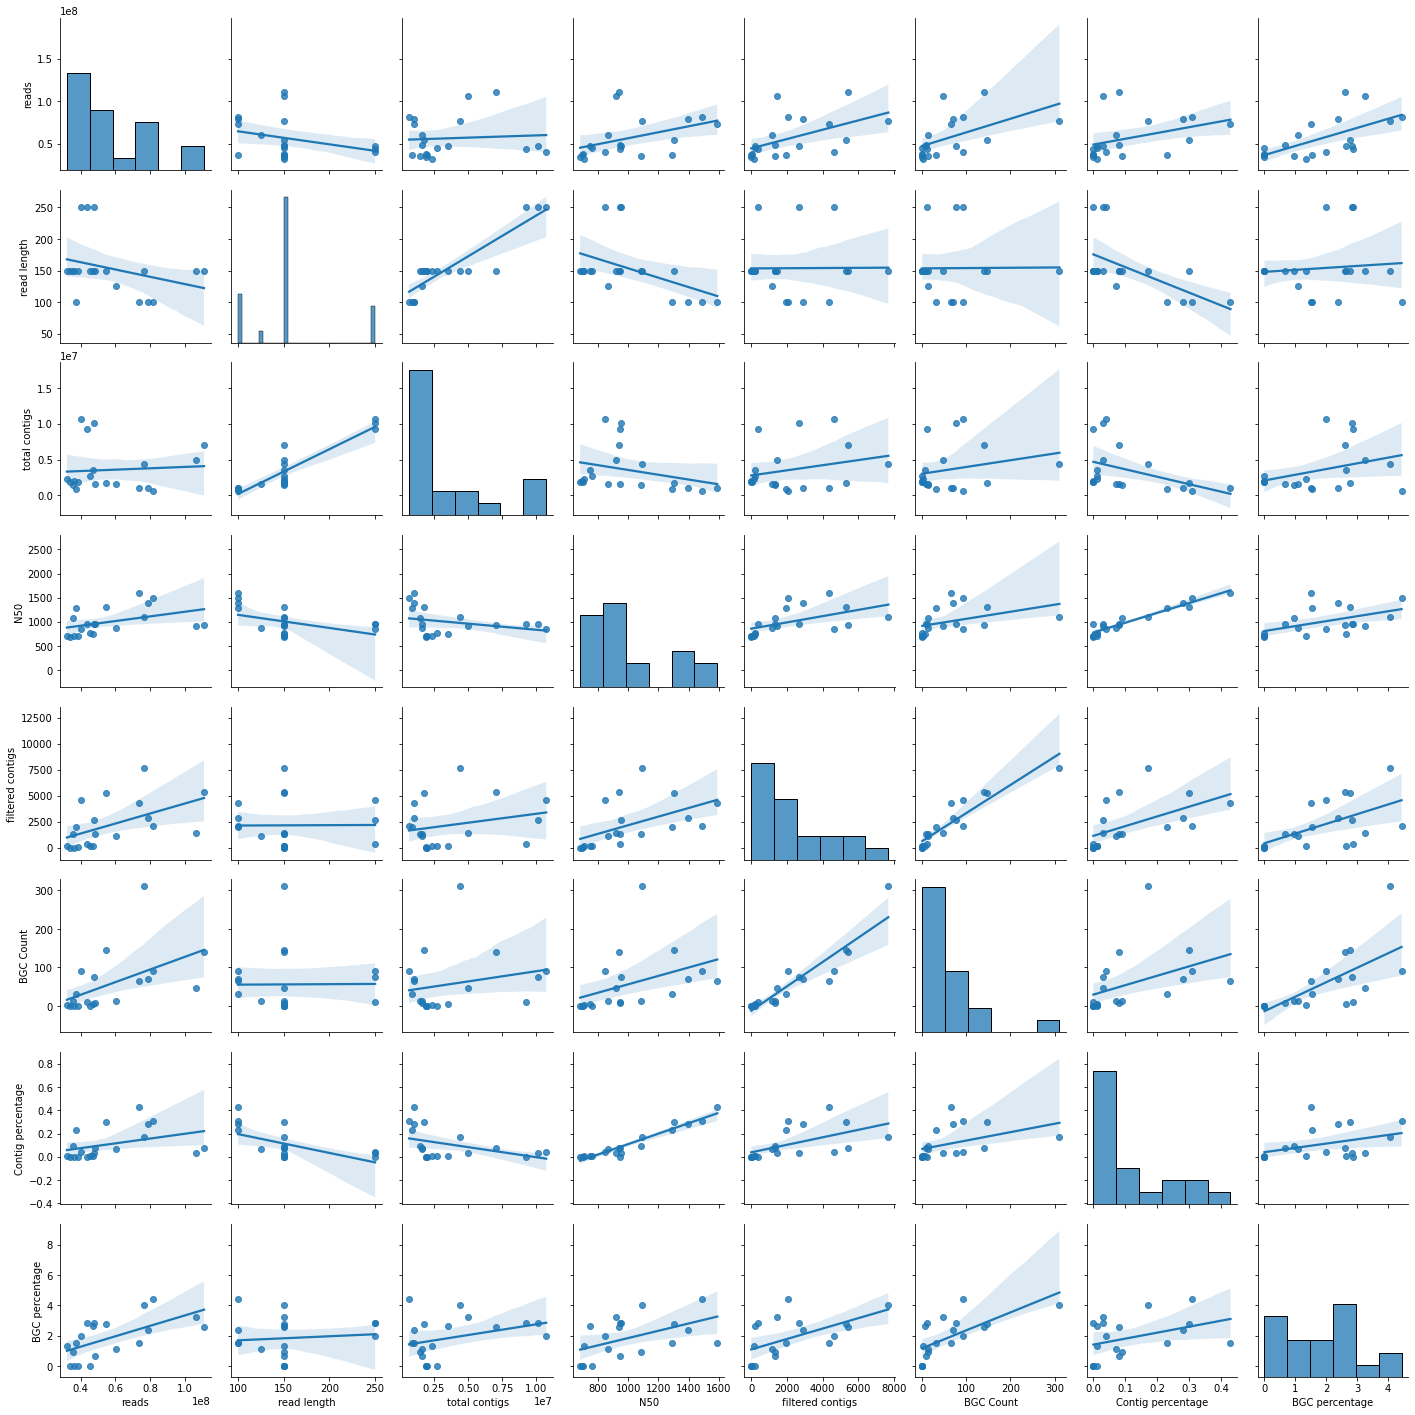

In [66]:
#pairplots, inspect relationships
seaborn.pairplot(lengths, kind="reg")

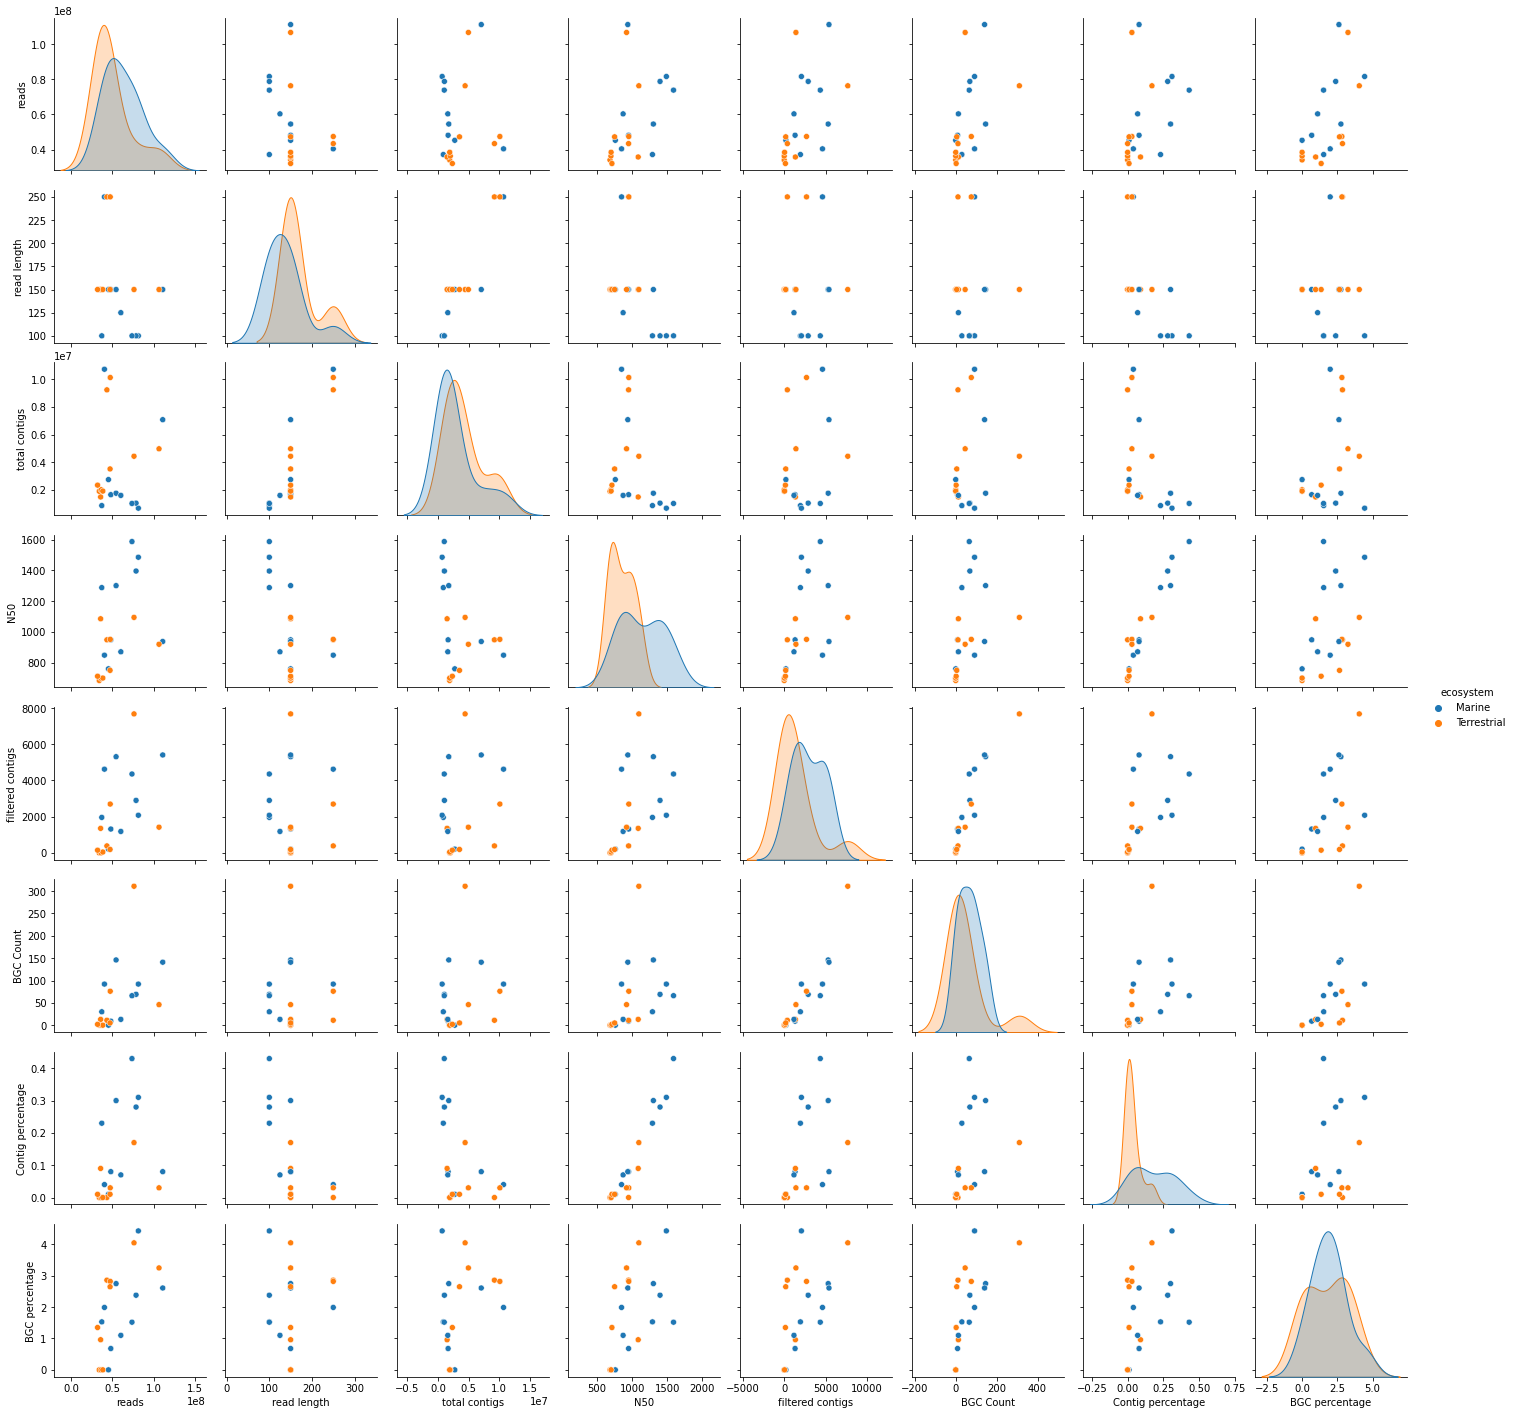

In [67]:
#pairplots suggest I look into correlations between BGCs, reads, contig metrics
seaborn.pairplot(lengths, hue = 'ecosystem')